In [2]:
import  pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

## Loading Data

In [3]:
data = pd.read_csv("tranall2011_19.csv")

D:\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (40,60) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [4]:
len(data)

5732838

In [5]:
select_columns = ["id","transactionid","oa11","postcode","price","dateoftransfer","propertytype","oldnew","duration","paon","saon","street","locality","towncity","district","county","categorytype","recordstatus","year","lsoa11","msoa11","laua","lad11nm","gor","rgn11nm","classt","propertytype_epc","inspectiondate","lodgementdate","tfarea","numberrooms","priceper","BUILDING_REFERENCE_NUMBER","CURRENT_ENERGY_RATING","POTENTIAL_ENERGY_RATING","CURRENT_ENERGY_EFFICIENCY","POTENTIAL_ENERGY_EFFICIENCY","BUILT_FORM","LOCAL_AUTHORITY","CONSTITUENCY","COUNTY","TRANSACTION_TYPE","ENVIRONMENT_IMPACT_CURRENT","ENVIRONMENT_IMPACT_POTENTIAL","ENERGY_CONSUMPTION_CURRENT","ENERGY_CONSUMPTION_POTENTIAL","CO2_EMISSIONS_CURRENT","CO2_EMISS_CURR_PER_FLOOR_AREA","CO2_EMISSIONS_POTENTIAL","LIGHTING_COST_CURRENT","LIGHTING_COST_POTENTIAL","HEATING_COST_CURRENT","HEATING_COST_POTENTIAL","HOT_WATER_COST_CURRENT","HOT_WATER_COST_POTENTIAL","ENERGY_TARIFF","MAINS_GAS_FLAG","FLOOR_LEVEL","FLAT_TOP_STOREY","FLAT_STOREY_COUNT","MAIN_HEATING_CONTROLS","MULTI_GLAZE_PROPORTION","GLAZED_TYPE","GLAZED_AREA","EXTENSION_COUNT","NUMBER_HEATED_ROOMS","LOW_ENERGY_LIGHTING","NUMBER_OPEN_FIREPLACES","HOTWATER_DESCRIPTION","HOT_WATER_ENERGY_EFF","HOT_WATER_ENV_EFF","FLOOR_DESCRIPTION","FLOOR_ENERGY_EFF","FLOOR_ENV_EFF","WINDOWS_DESCRIPTION","WINDOWS_ENERGY_EFF","WINDOWS_ENV_EFF","WALLS_DESCRIPTION","WALLS_ENERGY_EFF","WALLS_ENV_EFF","SECONDHEAT_DESCRIPTION","SHEATING_ENERGY_EFF","SHEATING_ENV_EFF","ROOF_DESCRIPTION","ROOF_ENERGY_EFF","ROOF_ENV_EFF","MAINHEAT_DESCRIPTION","MAINHEAT_ENERGY_EFF","MAINHEAT_ENV_EFF","MAINHEATCONT_DESCRIPTION","MAINHEATC_ENERGY_EFF","MAINHEATC_ENV_EFF","LIGHTING_DESCRIPTION","LIGHTING_ENERGY_EFF","LIGHTING_ENV_EFF","MAIN_FUEL","WIND_TURBINE_COUNT","HEAT_LOSS_CORRIDOOR","UNHEATED_CORRIDOR_LENGTH","FLOOR_HEIGHT","PHOTO_SUPPLY","SOLAR_WATER_HEATING_FLAG","MECHANICAL_VENTILATION","LOCAL_AUTHORITY_LABEL","CONSTITUENCY_LABEL"]

In [6]:
data = data[select_columns]

In [7]:
len(data)

5732838

In [8]:
data_select = data[data['dateoftransfer']>='2017-01-01']

In [9]:
len(data_select)

1814717

In [10]:
data_select=data_select.drop('id',axis=1)
data_select=data_select.drop('transactionid',axis=1)
data_select=data_select.drop('oa11',axis=1)
data_select=data_select.drop('postcode',axis=1)
for item in data_select.columns:
    if(item.endswith("DESCRIPTION")):
        data_select=data_select.drop(item,axis=1)
# data_select.to_csv("select_tranall2011_19.csv")

In [11]:
data_select.head()

,price,dateoftransfer,propertytype,oldnew,duration,paon,saon,street,locality,towncity,...,MAIN_FUEL,WIND_TURBINE_COUNT,HEAT_LOSS_CORRIDOOR,UNHEATED_CORRIDOR_LENGTH,FLOOR_HEIGHT,PHOTO_SUPPLY,SOLAR_WATER_HEATING_FLAG,MECHANICAL_VENTILATION,LOCAL_AUTHORITY_LABEL,CONSTITUENCY_LABEL
1,394000.0,2017-10-23,T,N,F,61,NaN,BAILEY ROAD,WESTCOTT,DORKING,...,mains gas (not community),0,NO DATA!,NaN,NaN,NaN,N,natural,Mole Valley,Mole Valley
3,700700.0,2017-01-23,D,N,F,12,NaN,RANDALLS ROAD,NaN,LEATHERHEAD,...,mains gas (not community),0,NO DATA!,NaN,2.56,NaN,N,natural,Mole Valley,Mole Valley
4,350000.0,2018-01-03,F,N,L,WOODLODGE,5,WOODFIELD LANE,NaN,ASHTEAD,...,mains gas (not community),0,unheated corridor,7.2,NaN,NaN,N,natural,Mole Valley,Epsom and Ewell
9,522500.0,2019-04-23,D,N,F,BUCKLAND COURT COTTAGE,NaN,REIGATE ROAD,BUCKLAND,BETCHWORTH,...,mains gas (not community),0,NO DATA!,NaN,NaN,NaN,N,natural,Mole Valley,Mole Valley
11,645000.0,2017-01-19,D,N,F,BAGGINS COTTAGE,NaN,UNDERHILL ROAD,NEWDIGATE,DORKING,...,mains gas - this is for backwards compatibilit...,0,NO DATA!,NaN,2.40,0.0,N,natural,Mole Valley,Mole Valley


In [14]:
data_select.shape

(1814717, 92)

## Missing data analysis and handling

In [15]:
## columns
s = pd.Series(data_select.isnull().sum())
null_columns=[]
for i in range(len(s)):
    if(s[i]>0):
        null_columns.append(i)

In [16]:
## price
data_select['price'].describe()

count    1.814717e+06
mean     2.826692e+05
std      2.795180e+05
min      1.000000e+04
25%      1.450000e+05
50%      2.200000e+05
75%      3.400000e+05
max      3.772000e+07
Name: price, dtype: float64

D:\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


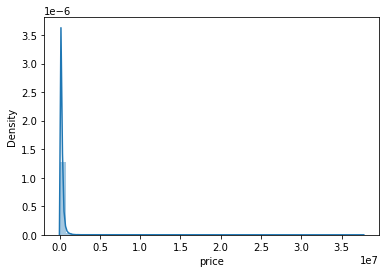

In [17]:
sns.distplot(data_select['price'])
plt.savefig("Price distribution.png")

In [18]:
# Missing value analysis
total = data_select.isnull().sum().sort_values(ascending=False)
percent = (data_select.isnull().sum()/data_select.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
FLOOR_ENV_EFF,1814717,1.000000
SHEATING_ENV_EFF,1814717,1.000000
SHEATING_ENERGY_EFF,1814717,1.000000
FLAT_STOREY_COUNT,1752420,0.965671
UNHEATED_CORRIDOR_LENGTH,1680146,0.925845
saon,1658364,0.913842
FLAT_TOP_STOREY,1555896,0.857377
FLOOR_HEIGHT,1323745,0.729450
PHOTO_SUPPLY,1202282,0.662518
locality,1127893,0.621526


In [19]:
## Delete columns with greater than 15% missing values
data_select = data_select.drop((missing_data[missing_data['Percent'] > 0.15]).index,1)

In [20]:
total = data_select.isnull().sum().sort_values(ascending=False)
percent = (data_select.isnull().sum()/data_select.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
ROOF_ENERGY_EFF,160403,0.088390
ROOF_ENV_EFF,160403,0.088390
street,27757,0.015295
MULTI_GLAZE_PROPORTION,17928,0.009879
CONSTITUENCY_LABEL,2435,0.001342
CONSTITUENCY,2435,0.001342
MAIN_HEATING_CONTROLS,1555,0.000857
LOW_ENERGY_LIGHTING,1535,0.000846
MAINS_GAS_FLAG,1500,0.000827
LIGHTING_ENERGY_EFF,492,0.000271


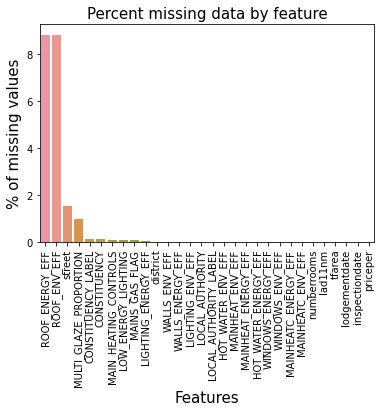

In [22]:
# Visualisation of missing values after deletion
sns.barplot(x=missing_data.index[0:30], y=missing_data['Percent'][0:30].apply(lambda x:x*100))
plt.xticks(rotation='90')
plt.xlabel('Features', fontsize=15)
plt.ylabel('% of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15);
plt.savefig("Percent missing data by feature after deletion")

In [23]:
# from sklearn.model_selection import train_test_split

# X_columns = list(data_select.columns)
# X_columns.remove("price")
# X_train,X_test,y_train,y_test = train_test_split(data_select[X_columns],data_select['price'].values,test_size = 0.2,random_state =123)

In [24]:
X_train = data_select

# Outlier processing

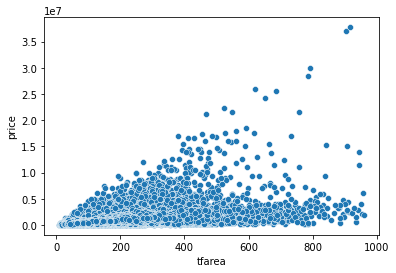

In [25]:
sns.scatterplot(data=X_train, x='tfarea', y='price')
plt.savefig("Scatter plot of housing area and price distribution")

In [26]:
X_train = X_train.drop(X_train[(X_train['tfarea']>800) & (X_train['price']>2.8e7)].index)

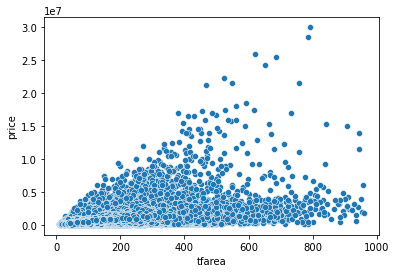

In [27]:
sns.scatterplot(data=X_train, x='tfarea', y='price')
plt.savefig("Scatter plot of housing area and price distribution after removing outliers")

In [24]:
X_train.select_dtypes(["float64"]).columns

Index(['price', 'tfarea', 'priceper', 'ENERGY_CONSUMPTION_POTENTIAL',
       'CO2_EMISSIONS_CURRENT', 'CO2_EMISS_CURR_PER_FLOOR_AREA',
       'CO2_EMISSIONS_POTENTIAL', 'MULTI_GLAZE_PROPORTION',
       'LOW_ENERGY_LIGHTING', 'NUMBER_OPEN_FIREPLACES'],
      dtype='object')

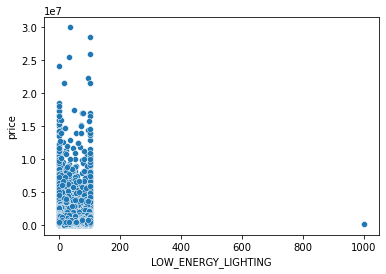

In [28]:
sns.scatterplot(data=X_train, x='LOW_ENERGY_LIGHTING', y='price')
X_train = X_train.drop(X_train[(X_train['LOW_ENERGY_LIGHTING']>800)].index)
plt.savefig("Scatter diagram of low energy lighting and price distribution")

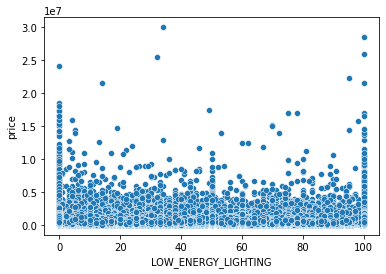

In [29]:
sns.scatterplot(data=X_train, x='LOW_ENERGY_LIGHTING', y='price')
plt.savefig("Scatter diagram of low energy lighting and price distribution after removing outliers")

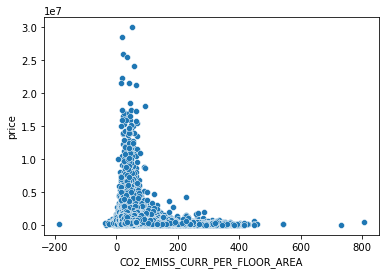

In [30]:
sns.scatterplot(data=X_train, x='CO2_EMISS_CURR_PER_FLOOR_AREA', y='price')
X_train = X_train.drop(X_train[(X_train['CO2_EMISS_CURR_PER_FLOOR_AREA']>500) | (X_train['CO2_EMISS_CURR_PER_FLOOR_AREA']<-100)].index)
plt.savefig("Scatter plot of CO2 emissions per m2 versus price ")

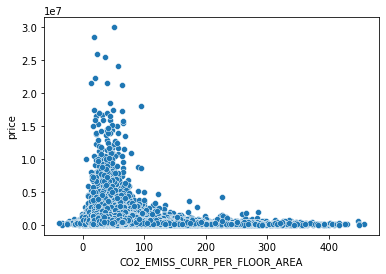

In [31]:
sns.scatterplot(data=X_train, x='CO2_EMISS_CURR_PER_FLOOR_AREA', y='price')
plt.savefig("Scatter plot of CO2 emissions per m2 versus price after removal of outliers  ")

D:\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


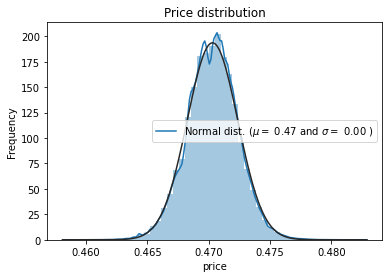

In [37]:
from scipy.stats import norm, skew
from scipy import stats
##  对预测变量进行 log transformer

X_train["price"] = np.log1p(X_train["price"])

sns.distplot(X_train['price'] , fit=norm);

#Fitted parameters used by function
(mu, sigma) = norm.fit(X_train['price'])

#Visualize Normal Distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('Price distribution')
plt.savefig("Frequency distribution of the target variable after conversion.png")



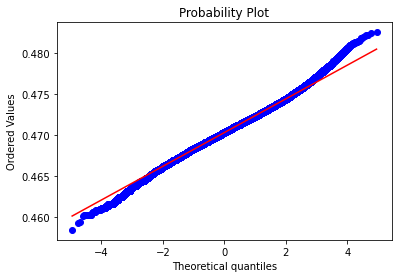

In [52]:
#Visualize Quantile-Quantile plot
fig = plt.figure()
res = stats.probplot(X_train['price'], plot=plt)
plt.savefig("Quantile-Quantile plot after conversion of target variables.png")
plt.show()


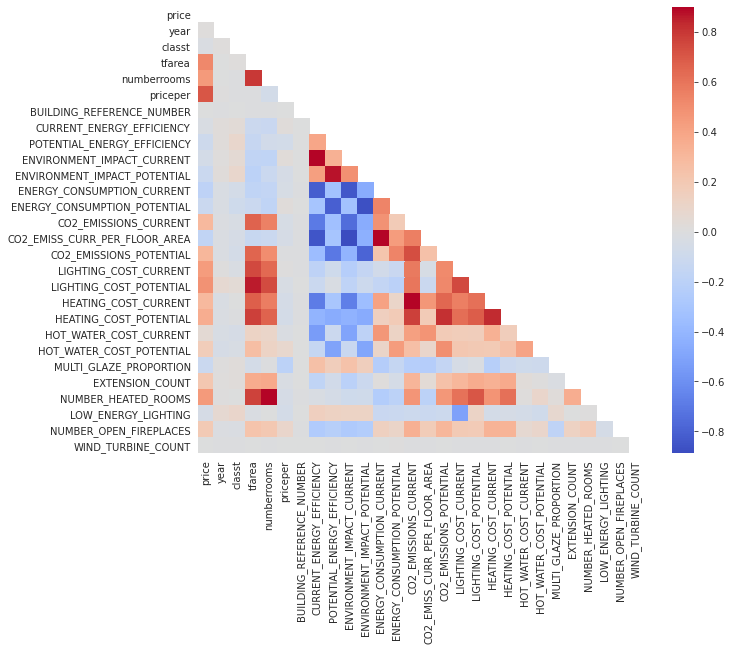

In [40]:
## Correlation of characteristic variables
corrmat = X_train.corr()
mask = np.zeros_like(corrmat)
mask[np.triu_indices_from(mask)] = True

with sns.axes_style("white"):

    f, ax = plt.subplots(figsize=(10, 10))
    sns.heatmap(corrmat, mask=mask, ax=ax, cbar_kws={"shrink": .82},vmax=.9, cmap='coolwarm', square=True)
plt.savefig("Correlation of characteristic variables")

In [41]:
# Since price and pricer are strongly correlated, remove the feature, otherwise it will leak.
del X_train['priceper']

In [42]:
numerical_list=list(X_train.select_dtypes(include=['float32','float64', 'int64']).columns.tolist())
categorical_list=list(X_train.select_dtypes(exclude=['float32','float64', 'int64']).columns.tolist())

In [43]:

for i in categorical_list:
    if(len(X_train[i].value_counts().index)>500 or len(X_train[i].value_counts().index)<2):
        del X_train[i]

D:\anaconda3\lib\site-packages\seaborn\axisgrid.py:1912: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


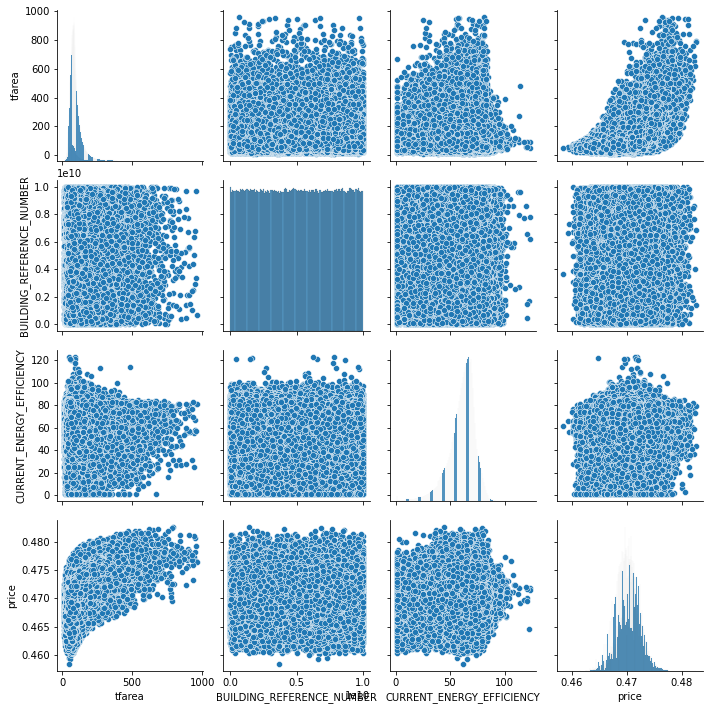

In [50]:
# 
# sns.set()
# numerical_list.remove("priceper")
cols = ['tfarea','BUILDING_REFERENCE_NUMBER','CURRENT_ENERGY_EFFICIENCY','price']
sns.pairplot(X_train[cols], size = 2.5)
plt.savefig("Scatter plot of numerical variables.png")
plt.show()


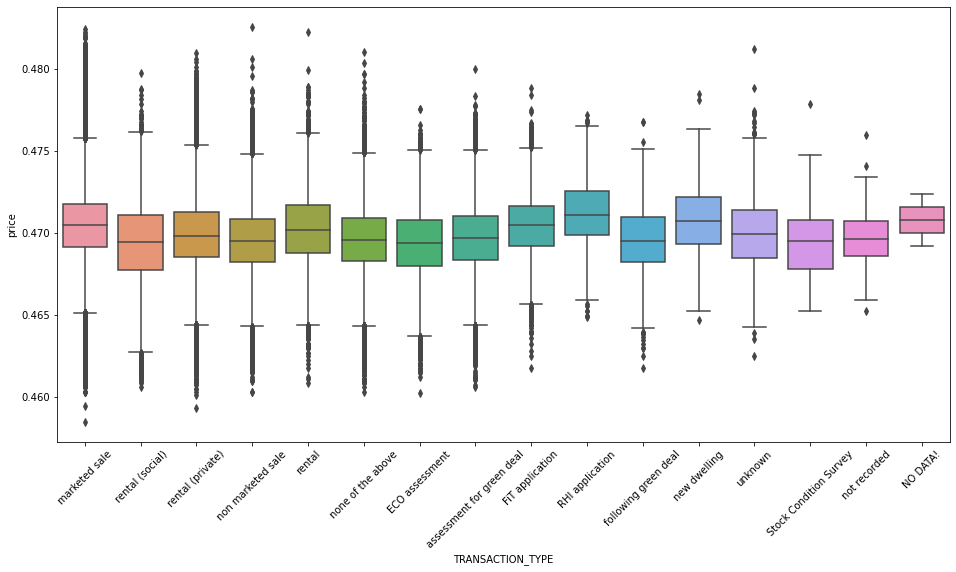

In [51]:
#Categorical variables
data = pd.concat([X_train['price'], X_train['TRANSACTION_TYPE']], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=X_train['TRANSACTION_TYPE'], y="price", data=data)
plt.xticks(rotation=45)
plt.savefig("Box plot of Transaction type")
plt.show()


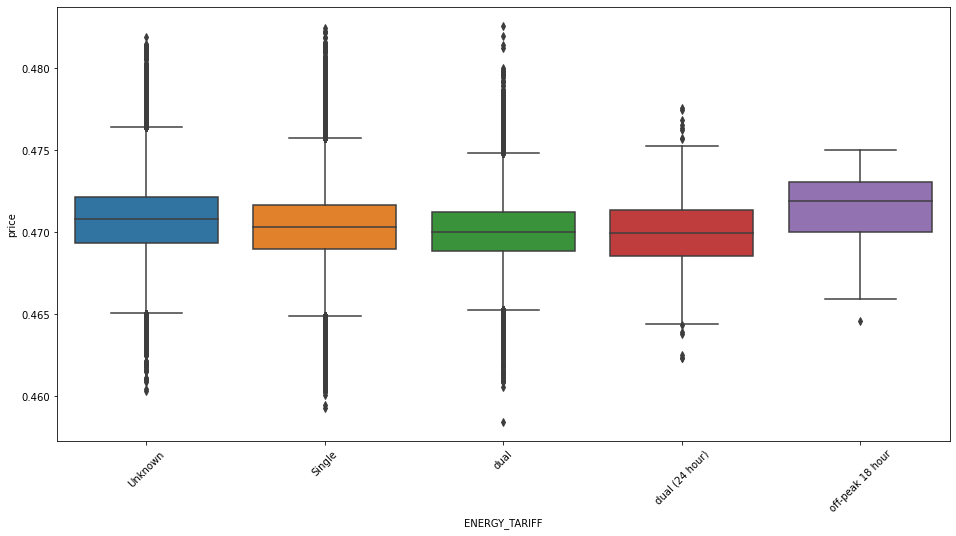

In [53]:
data = pd.concat([X_train['price'], X_train['ENERGY_TARIFF']], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=X_train['ENERGY_TARIFF'], y="price", data=data)
plt.xticks(rotation=45)
plt.savefig("Box plot of Energy Tariff")
plt.show()


## Missing value padding

In [54]:
miss_data = list(missing_data[missing_data['Total']>0].index)
miss_data = [i for i in  miss_data if i in list(X_train.columns)]

In [55]:
## Distinguish between numeric variables and category variables
numerical_list=list(X_train.select_dtypes(include=['float64', 'int64']).columns.tolist())
categorical_list=list(X_train.select_dtypes(exclude=['float64', 'int64']).columns.tolist())
for i in miss_data:
    if i in numerical_list:
        X_train[i].fillna(0, inplace=True)
    else:
        X_train[i].fillna("unknow", inplace=True)

#  Converting Category Variables

In [56]:
## encode
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, RobustScaler

## 
X_train['year'] = X_train['year'].apply(str)
X_train['classt'] = X_train['classt'].apply(str)
X_train['MAIN_HEATING_CONTROLS'] = X_train['MAIN_HEATING_CONTROLS'].apply(str)
categorical_list.append("year")
categorical_list.append("classt")
ordinal_to_encode = categorical_list

for field in ordinal_to_encode:
    le = LabelEncoder()
    if field in list(X_train.columns):
        X_train[field] = le.fit_transform(X_train[field].values)

In [57]:
from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import train_test_split

# from sklearn.model_selection import train_test_split

X_columns = list(X_train.columns)
X_columns.remove("price")
# X_train,X_test,y_train,y_test = train_test_split(data_select[X_columns],data_select['price'].values,test_size = 0.2,random_state =123)

numerical_list=list(X_train.select_dtypes(include=['float32','float64', 'int64']).columns.tolist())
numerical_list.remove("price")
categorical_list=list(X_train.select_dtypes(exclude=['float32','float64', 'int64']).columns.tolist())

for field in numerical_list:
    scaler = MinMaxScaler()
    if field in list(X_columns):
        X_train[field] = le.fit_transform(X_train[field].values)

x_train,x_test,y_train,y_test = train_test_split(X_train[X_columns],X_train['price'],test_size=0.3,random_state=6)

In [59]:
#validation
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1814709 entries, 1 to 5732834
Data columns (total 66 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   price                          float64
 1   propertytype                   int32  
 2   oldnew                         int32  
 3   duration                       int32  
 4   district                       int32  
 5   county                         int32  
 6   year                           int32  
 7   laua                           int32  
 8   lad11nm                        int32  
 9   gor                            int32  
 10  rgn11nm                        int32  
 11  classt                         int32  
 12  propertytype_epc               int32  
 13  tfarea                         int64  
 14  numberrooms                    int64  
 15  BUILDING_REFERENCE_NUMBER      int64  
 16  CURRENT_ENERGY_RATING          int32  
 17  POTENTIAL_ENERGY_RATING        int32  
 18  CU

In [ ]:
#import pandas_profiling as ppf

In [45]:

## ppf.ProfileReport(x_test[0:100])

## Modeling

In [62]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb
import time
from xgboost import plot_importance
def plot_features(booster, figsize):    
    fig, ax = plt.subplots(1,1,figsize=figsize)
    return plot_importance(booster=booster, ax=ax)

In [63]:
model_xgb = xgb.XGBRegressor(
    max_depth=5,
    n_estimators=400,
    colsample_bytree=0.8, 
    subsample=0.8, 
    eta=0.03,    
    seed=42)

In [65]:
ts = time.time()
model_xgb.fit(
    x_train, 
    y_train, 
    eval_metric="rmse", 
    eval_set=[(x_train, y_train)], 
    verbose=True, 
    early_stopping_rounds = 10)
time.time() - ts

[0]	validation_0-rmse:0.02886
[1]	validation_0-rmse:0.02800
[2]	validation_0-rmse:0.02716
[3]	validation_0-rmse:0.02635
[4]	validation_0-rmse:0.02556
[5]	validation_0-rmse:0.02479
[6]	validation_0-rmse:0.02405
[7]	validation_0-rmse:0.02333
[8]	validation_0-rmse:0.02263
[9]	validation_0-rmse:0.02196
[10]	validation_0-rmse:0.02130
[11]	validation_0-rmse:0.02066
[12]	validation_0-rmse:0.02005
[13]	validation_0-rmse:0.01945
[14]	validation_0-rmse:0.01886
[15]	validation_0-rmse:0.01830
[16]	validation_0-rmse:0.01775
[17]	validation_0-rmse:0.01722
[18]	validation_0-rmse:0.01671
[19]	validation_0-rmse:0.01621
[20]	validation_0-rmse:0.01573
[21]	validation_0-rmse:0.01526
[22]	validation_0-rmse:0.01480
[23]	validation_0-rmse:0.01436
[24]	validation_0-rmse:0.01393
[25]	validation_0-rmse:0.01352
[26]	validation_0-rmse:0.01311
[27]	validation_0-rmse:0.01273
[28]	validation_0-rmse:0.01235
[29]	validation_0-rmse:0.01198
[30]	validation_0-rmse:0.01162
[31]	validation_0-rmse:0.01128
[32]	validation_0-

[260]	validation_0-rmse:0.00092
[261]	validation_0-rmse:0.00092
[262]	validation_0-rmse:0.00092
[263]	validation_0-rmse:0.00092
[264]	validation_0-rmse:0.00092
[265]	validation_0-rmse:0.00092
[266]	validation_0-rmse:0.00092
[267]	validation_0-rmse:0.00092
[268]	validation_0-rmse:0.00091
[269]	validation_0-rmse:0.00091
[270]	validation_0-rmse:0.00091
[271]	validation_0-rmse:0.00091
[272]	validation_0-rmse:0.00091
[273]	validation_0-rmse:0.00091
[274]	validation_0-rmse:0.00091
[275]	validation_0-rmse:0.00091
[276]	validation_0-rmse:0.00091
[277]	validation_0-rmse:0.00091
[278]	validation_0-rmse:0.00091
[279]	validation_0-rmse:0.00091
[280]	validation_0-rmse:0.00091
[281]	validation_0-rmse:0.00091
[282]	validation_0-rmse:0.00091
[283]	validation_0-rmse:0.00091
[284]	validation_0-rmse:0.00091
[285]	validation_0-rmse:0.00091
[286]	validation_0-rmse:0.00091
[287]	validation_0-rmse:0.00091
[288]	validation_0-rmse:0.00091
[289]	validation_0-rmse:0.00091
[290]	validation_0-rmse:0.00091
[291]	va

678.83256316185

In [64]:
plt.plot(model_xgb.evals_result()['validation_0']['rmse'],label = "train")
plt.title('xgboost train rmse',fontsize='large')
plt.savefig("XGBoost Training and RMSE Changes ")
plt.show()

XGBoostError: No evaluation result, `eval_set` is not used during training.

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

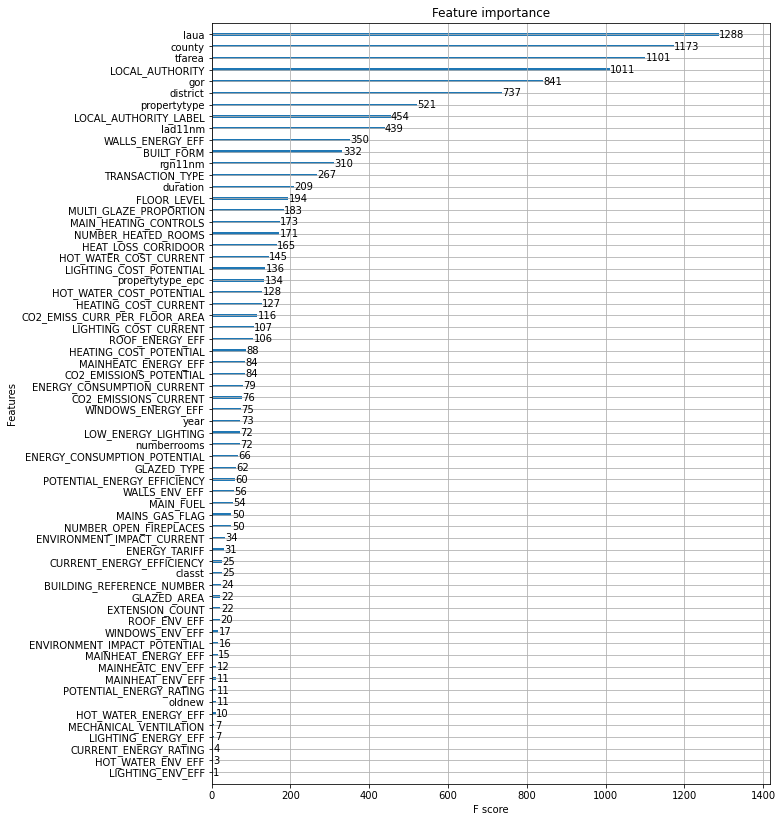

In [49]:
plot_features(model_xgb, (10,14))

In [50]:
print (model_xgb.score(x_test, y_test))

0.8254866860690763


In [51]:
rf = RandomForestRegressor(n_estimators=100,
                          max_depth=10,
                          criterion='mse',
                          min_samples_split=5,
                          min_samples_leaf=5,
                          max_features=None,
                          oob_score=True,
                           n_jobs =10,
                          random_state=42)

In [52]:
ts = time.time()
rf.fit(x_train, y_train)
time.time() - ts

644.7082397937775

In [53]:
print (np.sqrt(rf.score(x_train, y_train)))

0.885895113084818


In [54]:
print (np.sqrt(rf.score(x_test, y_test)))

0.8844205719153162


In [55]:
## lightgbm
model_lgb= lgb.LGBMRegressor(
    max_depth=5,
    n_estimators=400,
    colsample_bytree=0.8, 
    subsample=0.8, 
    eta=0.03,    
    seed=42)

In [56]:
ts = time.time()
eval_result = {}
model_lgb.fit(
    x_train, 
    y_train, 
    eval_metric="rmse", 
    eval_set=[(x_train, y_train)], 
    verbose=True, 
    early_stopping_rounds = 10)
time.time() - ts

[LightGBM] [Warning] learning_rate is set=0.1, eta=0.03 will be ignored. Current value: learning_rate=0.1
[1]	training's rmse: 0.613072	training's l2: 0.375857
Training until validation scores don't improve for 10 rounds
[2]	training's rmse: 0.577337	training's l2: 0.333318
[3]	training's rmse: 0.545888	training's l2: 0.297993
[4]	training's rmse: 0.518695	training's l2: 0.269044
[5]	training's rmse: 0.493159	training's l2: 0.243206
[6]	training's rmse: 0.471487	training's l2: 0.2223
[7]	training's rmse: 0.452535	training's l2: 0.204788
[8]	training's rmse: 0.437385	training's l2: 0.191305
[9]	training's rmse: 0.422636	training's l2: 0.178621
[10]	training's rmse: 0.410086	training's l2: 0.168171
[11]	training's rmse: 0.399141	training's l2: 0.159314
[12]	training's rmse: 0.389685	training's l2: 0.151854
[13]	training's rmse: 0.381593	training's l2: 0.145614
[14]	training's rmse: 0.374614	training's l2: 0.140336
[15]	training's rmse: 0.36812	training's l2: 0.135512
[16]	training's rmse

[147]	training's rmse: 0.269175	training's l2: 0.0724551
[148]	training's rmse: 0.269103	training's l2: 0.0724162
[149]	training's rmse: 0.268991	training's l2: 0.0723561
[150]	training's rmse: 0.268902	training's l2: 0.0723085
[151]	training's rmse: 0.268849	training's l2: 0.0722797
[152]	training's rmse: 0.268586	training's l2: 0.0721384
[153]	training's rmse: 0.268085	training's l2: 0.0718697
[154]	training's rmse: 0.267822	training's l2: 0.0717284
[155]	training's rmse: 0.267622	training's l2: 0.0716213
[156]	training's rmse: 0.267488	training's l2: 0.0715496
[157]	training's rmse: 0.26724	training's l2: 0.0714172
[158]	training's rmse: 0.267124	training's l2: 0.0713553
[159]	training's rmse: 0.267046	training's l2: 0.0713137
[160]	training's rmse: 0.266979	training's l2: 0.0712779
[161]	training's rmse: 0.266867	training's l2: 0.071218
[162]	training's rmse: 0.266719	training's l2: 0.0711389
[163]	training's rmse: 0.266397	training's l2: 0.0709672
[164]	training's rmse: 0.266346	t

[292]	training's rmse: 0.253763	training's l2: 0.0643958
[293]	training's rmse: 0.253739	training's l2: 0.0643836
[294]	training's rmse: 0.253724	training's l2: 0.0643761
[295]	training's rmse: 0.253609	training's l2: 0.0643173
[296]	training's rmse: 0.253556	training's l2: 0.0642907
[297]	training's rmse: 0.253525	training's l2: 0.0642747
[298]	training's rmse: 0.253358	training's l2: 0.0641903
[299]	training's rmse: 0.253316	training's l2: 0.0641692
[300]	training's rmse: 0.253294	training's l2: 0.0641579
[301]	training's rmse: 0.25322	training's l2: 0.0641203
[302]	training's rmse: 0.2532	training's l2: 0.0641101
[303]	training's rmse: 0.253174	training's l2: 0.0640973
[304]	training's rmse: 0.253072	training's l2: 0.0640456
[305]	training's rmse: 0.253035	training's l2: 0.0640267
[306]	training's rmse: 0.253005	training's l2: 0.0640117
[307]	training's rmse: 0.252959	training's l2: 0.0639882
[308]	training's rmse: 0.252921	training's l2: 0.0639692
[309]	training's rmse: 0.252893	tr

22.838306188583374

In [57]:
feature_dict = {}
for i in range(len(model_lgb.feature_importances_)):
    feature_dict[x_train.columns[i]] = model_lgb.feature_importances_[i]
    

In [58]:
feature_dict = sorted(feature_dict.items(),key=lambda item:item[1])

In [59]:
feature_dict = dict(feature_dict)

D:\software\CodeSoftware\python3.6.5\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  import sys


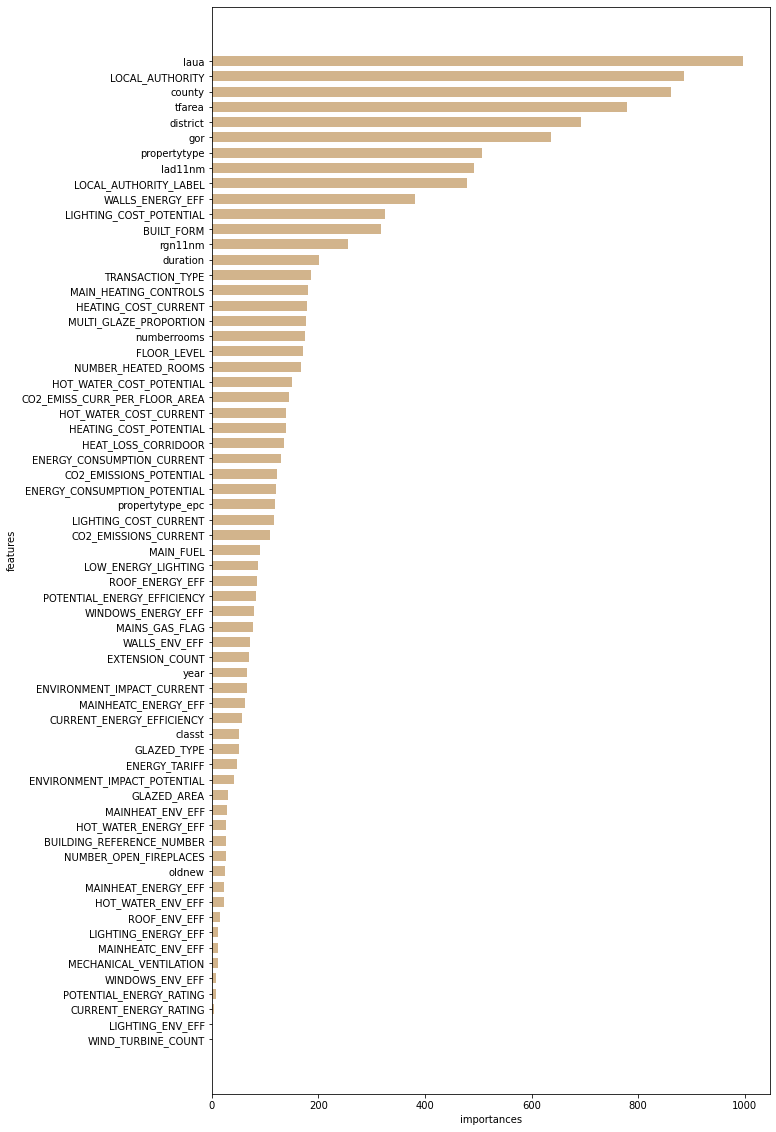

In [60]:
x_index = list(range(0,65))
x_index = [x/65 for x in x_index]
plt.rcParams['figure.figsize'] = (10,20)
plt.barh(x_index,list(feature_dict.values()),height = 0.01 ,align="center",color = 'tan',tick_label=list(feature_dict.keys()))
plt.xlabel('importances')
plt.ylabel('features')
plt.show()

In [61]:
print (model_lgb.score(x_test, y_test))

0.8545755746057158


D:\software\CodeSoftware\python3.6.5\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  after removing the cwd from sys.path.


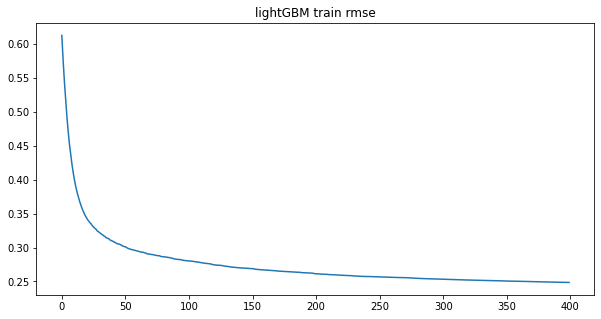

In [62]:
plt.rcParams['figure.figsize'] = (10,5)
plt.plot(model_lgb.evals_result_['training']['rmse'],label = "train")
plt.title('lightGBM train rmse',fontsize='large')
plt.show()